In [162]:
import pandas as pd
from matplotlib import pyplot as plt
import sympy as sp
import numpy as np
import seaborn as sns

## Mappeoppgave 2 - Innføring av bompenger i Tromsø: Effekt på bilisters atferd og velferd

### Kapittel 1. Innledning 

Bomstasjonene i Tromsø ble nylig satt i drift, 5. Januar 2023. Inntektene fra bomstasjonene er bilstene sitt bidrag til finansiering av bypakken Tenk Tromsø. Bidraget utgjør ca. 58 % av bypakkens totale økonomiske ramme som er på 6,5 milliarder kroner. På Tenk Tromsø sin nettside skriver de at bypakken er et byutviklingsprojekt der målet er å legge til rette for gange, sykkel og kollektivtransport slik at man oppnår hovedmålet om nullvekst i personbiltransport. Bypakken skal bidra til en mer fremtidsrettet by med bedre fremkommelighet for alle, bedre luft og mindre støy, som rommer vekst i antall hverdagsreiser samtidig som den sikrer et godt bymiljø for alle (Tenk Tromsø, u.å.) 

I lys av innføring av bompenger skal jeg utrede en analyse av effektene dette har på bilisters atferd og velferd.

##### Kort om bomstasjonene 

Det er blitt satt opp 15 bomstasjoner i Tromsø, disse har som nevnt vært i drift fra og med 5. Januar 2023. Tanken bak plasseringen av bomstasjonene er at de skal fange opp de største reisestrømmene i byområdet. Hensikten med dette er at flest mulig skal bidra til å betale. 

Bilister kan anvende AutoPASS som sørger for at passeringer blir automatisk registert, og at man får korrekt rabatt. Når man bestiller AutoPASS-avtale får man en brikke i posten. Brikken festes på innsiden av bilens frontrute. Om man ikke eier en brikke vil man måtte betale full pris for alle gjennomkjøringer. Det er flere selskaper som tilbyr AutoPASS, men det er lik rabatt uansett hvilket selskap det gjøres avtale med. Alle som har en gyldig avtale vil motta en rabatt på 20%. Elbiler med avtale mottar ytterligere 50% rabatt. Det er bompengeselskapet Nord som har ansvaret for å kreve inn bompengene i Tromsø. Alle bomstasjonene har toveisinnkreving. Dvs at man betaler bompenger i begge retninger. Man betaler bare for en passering i timen selv om man kjører gjennom flere bomstajoner. Timesregelen gjelder bare for de som har AutoPASS-avtale. Det er også et månedstak der du maksimalt betaler for 80 passeringer. Månedstaker gjelder for alle kalendermånender, og kun for de med AutoPASS-avtale. I rushperiodene er det dobbel takst. Dette gjelder mandag - fredag mellom kl. 06:30-09:00 og kl. 15:00-17:00. Rushtidsavgiften gjelder ikke på helgedager og offisielle fridager (Tenk Tromsø u.å.)

In [163]:
from IPython.display import Markdown
print("Takstgruppe 1 - Kjøretøy under 3,5 tonn")
tbl=f"""
|        -          | Bensin, diesel og ladbar hybrid  |            -           | Nullutslipskjøretøy |   -                       |
|-------------------|:--------------------------------:|----------------------: |--------------------:|---------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris            |   Gyldig avtale og brikke |      
| Alle bomstasjoner (15) |    12,00                    |   9,60                 | 12,00               |    4,80                   |
"""
display(Markdown(tbl))

Takstgruppe 1 - Kjøretøy under 3,5 tonn



|        -          | Bensin, diesel og ladbar hybrid  |            -           | Nullutslipskjøretøy |   -                       |
|-------------------|:--------------------------------:|----------------------: |--------------------:|---------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris            |   Gyldig avtale og brikke |      
| Alle bomstasjoner (15) |    12,00                    |   9,60                 | 12,00               |    4,80                   |


In [164]:
print("Rushtidsavgift 06:30-09:00 og 15:00-17:00")
tbl=f"""
|        -          | Bensin, diesel og ladbar hybrid  |  -                     | Nullutslipskjøretøy|   -                        |
|-------------------|:--------------------------------:|----------------------: |-------------------:|----------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris           |   Gyldig avtale og brikke  |
| Alle bomstasjoner (15) |    36,00                    |   28,80                |   36,00            |    14,40                   |
"""
display(Markdown(tbl))

Rushtidsavgift 06:30-09:00 og 15:00-17:00



|        -          | Bensin, diesel og ladbar hybrid  |  -                     | Nullutslipskjøretøy|   -                        |
|-------------------|:--------------------------------:|----------------------: |-------------------:|----------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris           |   Gyldig avtale og brikke  |
| Alle bomstasjoner (15) |    36,00                    |   28,80                |   36,00            |    14,40                   |


Priser er den direkte kostnaden som blir påført bilister. Transport kostnader inkluderer både pengekostnader, reisetid og risko. Endringer i priser kan slå ut i flere plan. En økning i pris kan påvirke hvor ofte man reiser, hvordan rute man velger, hvilke tidspunkter man reiser velger å reise på og hvilken type transport man velger. Hvordan pris påvirker konsum regnes oftest ved bruk elastisiter- den prosentvise endringen i konsum av en 1% økning i pris. 

In [165]:
månedstrafikk = pd.read_csv('https://raw.githubusercontent.com/loopdiggaz/SOK1006/main/Mappe2/m%C3%A5nedstrafikk.csv', sep=';')
månedstrafikk = månedstrafikk.loc[(månedstrafikk.Felt == 'Totalt'), ['År','Måned','Trafikkmengde','Navn']] 
månedstrafikk = månedstrafikk.rename(columns={'År':'YEAR','Måned' : 'MONTH', 'TROMSØBRUA': 'Tromsø Brua'})
månedstrafikk['Dato'] = pd.to_datetime(månedstrafikk[['YEAR', 'MONTH']].assign(DAY=1))
månedstrafikk.drop(['YEAR','MONTH'], inplace= True, axis = 1)
månedstrafikk['Dato']= pd.to_datetime(månedstrafikk['Dato'])

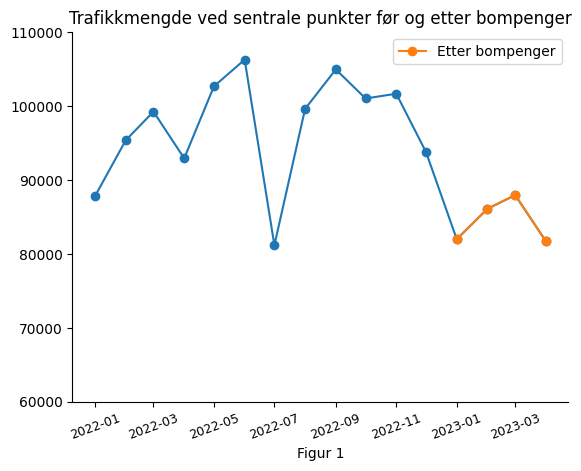

In [166]:
månedstrafikksum = månedstrafikk.groupby(['Dato'])['Trafikkmengde'].sum()
månedstrafikksum = månedstrafikksum.to_frame()
månedstrafikksum = månedstrafikksum.reset_index()
månedstrafikk2023 = månedstrafikksum[månedstrafikksum['Dato'] >= '2023-01-01']

fig, ax = plt.subplots()

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlabel('Figur 1')
ax.set_ylim(60000,110000)
ax.set_title('Trafikkmengde ved sentrale punkter før og etter bompenger');

ax.plot(månedstrafikksum['Dato'],månedstrafikksum['Trafikkmengde'], marker = 'o')
ax.plot(månedstrafikk2023['Dato'],månedstrafikk2023['Trafikkmengde'], marker = 'o', label = 'Etter bompenger')

ax.xaxis.set_tick_params(labelsize=9, rotation = 20) 
ax.legend(loc= 'best');

Figur 1 viser trafikkmengde ved seks sentrale punkter før og etter bompenger. 

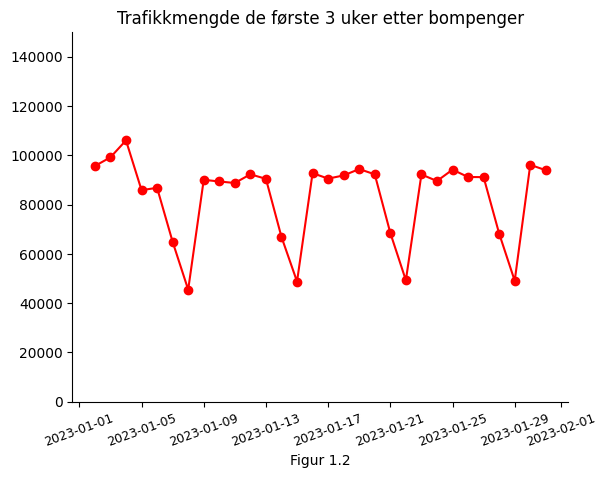

In [234]:
døgntrafikk = pd.read_csv('https://raw.githubusercontent.com/loopdiggaz/SOK1006/main/Mappe2/d%C3%B8gntrafikk.csv', sep=';')
døgntrafikk = døgntrafikk.loc[(døgntrafikk.Felt == 'Totalt'), ['Dato','Trafikkmengde','Navn']] 
døgntrafikksum = døgntrafikk.groupby(['Dato'])['Trafikkmengde'].sum() 
døgntrafikksum = døgntrafikksum.to_frame()
døgntrafikksum = døgntrafikksum.reset_index()

døgntrafikksum['Dato'] = pd.to_datetime(døgntrafikksum['Dato'], dayfirst= True)
døgntrafikksum2 = døgntrafikksum[(døgntrafikksum['Dato'] > '2023-01-01') & (døgntrafikksum['Dato'] < '2023-02-01')]

fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlabel('Figur 1.2')
ax.set_ylim(0,150000)
ax.plot(døgntrafikksum2['Dato'],døgntrafikksum2['Trafikkmengde'], marker = 'o', color = 'red')
ax.xaxis.set_tick_params(labelsize=9, rotation = 20)
ax.set_title('Trafikkmengde de første 3 uker etter bompenger');

Figur 1.2 viser trafikkmengden per dag i 3 uker etter innføringen av bompenger.

In [318]:
df_buss = pd.read_csv("https://raw.githubusercontent.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/main/data/antall%20p%C3%A5stigende.csv", parse_dates=['date'], dayfirst=True)

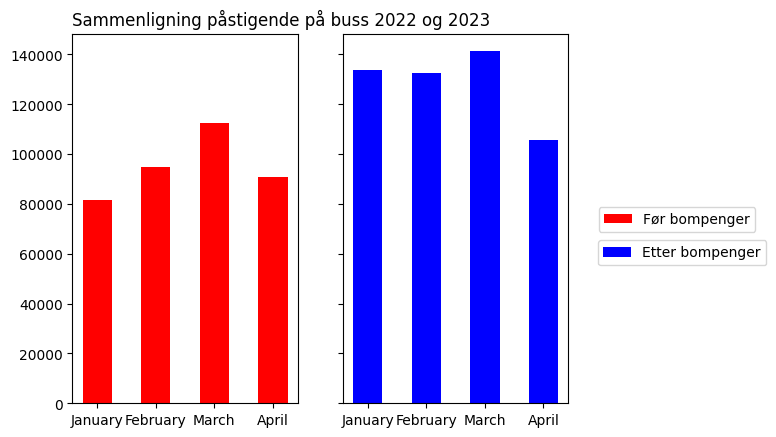

In [353]:
df_buss = pd.read_csv("https://raw.githubusercontent.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/main/data/antall%20p%C3%A5stigende.csv", parse_dates=['date'], dayfirst=True)

df_buss2022 = df_buss[(df_buss['date'] >= '2022-01-01') & (df_buss['date'] <= '2022-04-30')]
df_buss2022 = df_buss2022.groupby(['date'])['Påstigende'].sum() 
df_buss2022 = df_buss2022.to_frame()
df_buss2022 = df_buss2022.reset_index()

df_måned = df_buss2022.groupby(df_buss2022['date'].dt.strftime('%B'))['Påstigende'].sum()
df_måned = df_måned.to_frame()
df_måned = df_måned.reset_index()
df_måned['Påstigende'] = df_måned['Påstigende'].div(10)
months = ["January","February","March","April"]
df_måned['date'] = pd.Categorical(df_måned['date'], categories= months, ordered=True)
df_måned.sort_values(by='date', inplace=True)

# Etter bompenger
df_buss2 = df_buss[(df_buss['date'] >= '2023-01-01') & (df_buss['date'] <= '2023-04-30')]
df_måned2 = df_buss2.groupby(df_buss2['date'].dt.strftime('%B'))['Påstigende'].sum()
df_måned2 = df_måned2.to_frame()
df_måned2 = df_måned2.reset_index()
df_måned2['Påstigende'] = df_måned2['Påstigende'].div(10)
months2 = ["January", "February", "March", "April"]
df_måned2['date'] = pd.Categorical(df_måned2['date'], categories= months2, ordered=True)
df_måned2.sort_values(by='date', inplace=True)

fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.bar(df_måned['date'],df_måned["Påstigende"], width = 0.5 ,color = 'red',label = 'Før bompenger')
ax2.bar(df_måned2['date'],df_måned2["Påstigende"], width = 0.5 , color='blue',label = 'Etter bompenger')
ax1.set_title('Sammenligning påstigende på buss 2022 og 2023', loc = 'left')
ax2.legend(bbox_to_anchor=(1.1,0.46))
ax1.legend(bbox_to_anchor=(3.06,0.55));

Figur 1.3 viser antall påstigende med buss før og etter bompenger. 

### Kapittel 3. Bilisters tilpasning til bompenger. 

Modellen som brukes i analysen er en forenkling av virkeligheten. Modellen bygger på noen forutsetninger: 
- Konsumenten velger mellom to goder som kan måles i noe entydig, som i dette tilfellet er kroner. 
- Nytten fra konsum er kun avhengig av eget konsum. 
- Prisene tas for gitt og konsumenten har full oversikt over egenskapene til godene. 
- Hele inntekten til konsumenten går til konsum, sparing blir således sett bort ifra. 
- Formålet til konsumenten er å makismere sin nytte, ved å konsumere mest mulig. 

Konsumenten kan velge mellom 1. Andre goder og 2. Antall kilometer kjørt. Andre goder er blitt gitt prisen 1 kr, slik at det blir et mål i penger. 

In [229]:
import requests
from pyjstat import pyjstat
postUrl = "https://data.ssb.no/api/v0/no/table/12576/"
apiQuery = { "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg_single:FylkerGjeldende",
        "values": [
          "54"
        ]
      }
    },
    {
      "code": "Kjoretoytype",
      "selection": {
        "filter": "item",
        "values": [
          "15"
        ]
      }
    },
    {
      "code": "DrivstoffType",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "18"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "GjsnittKjorelengde"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2020",
          "2021",
          "2022"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }}
def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds
df_kmkjørt, df_id, ds = apiToDataframe(postUrl, apiQuery)
df_kmkjørt
#print('Troms og finnmark')
#df_kmkjørt = df_kmkjørt.pivot(columns=['drivstofftype'], values='value', index='år')
#df_kmkjørt


,region,kjøretøytype,drivstofftype,statistikkvariabel,år,value
0,Troms og Finnmark - Romsa ja Finnmárku,Personbiler i alt,Bensin,Gjennomsnittlig kjørelengde per kjøretøy (km),2020,7682
1,Troms og Finnmark - Romsa ja Finnmárku,Personbiler i alt,Bensin,Gjennomsnittlig kjørelengde per kjøretøy (km),2021,7779
2,Troms og Finnmark - Romsa ja Finnmárku,Personbiler i alt,Bensin,Gjennomsnittlig kjørelengde per kjøretøy (km),2022,7476
3,Troms og Finnmark - Romsa ja Finnmárku,Personbiler i alt,Elektrisitet,Gjennomsnittlig kjørelengde per kjøretøy (km),2020,10157
4,Troms og Finnmark - Romsa ja Finnmárku,Personbiler i alt,Elektrisitet,Gjennomsnittlig kjørelengde per kjøretøy (km),2021,10950
5,Troms og Finnmark - Romsa ja Finnmárku,Personbiler i alt,Elektrisitet,Gjennomsnittlig kjørelengde per kjøretøy (km),2022,11334


Ifølge SSB var gjennomsnittlig kjørelengde for en personbil med fossilt brennstoff 7476 km i 2022. Vi kan sette opp ulike scenarioer: Vi antar først at en gjennomsnittlig billist har 3 bompasseringer per dag, 2 ganger i rushtrafikk, og 1 gang utenom rush. Dersom vi legger sammen taksten per passering vil man måtte betale 69.6 kroner hver dag. Vi kan bruke dette til å regne prisen per km som blir 0,29 kr eller 5,8 kr per dag. 

Transportøkonomisk institutt har gjort en undersøkelse på personbiltrafikken, der de fant at personbiltrafikken kom til å synke med ca. 4,5 prosent. Dette tilsvarer en priselasitistet på -4,47/20 = ca. -0,22. Videre har TØI også funnet distanseavhengige kostnader per kilometer som i 2022 var 3,03 kr per kilometer. Vi kan bruke disse estimatene i modellen vår. 

I følge Statistisk Sentralbyrå (SSB) var gjennomsnittlig månedslønn i 2022 på 53 150 kroner. Dersom vi deler dette på antall dager i et år, kan vi bruke dette som et røft estimat for dagsbudsjett. 

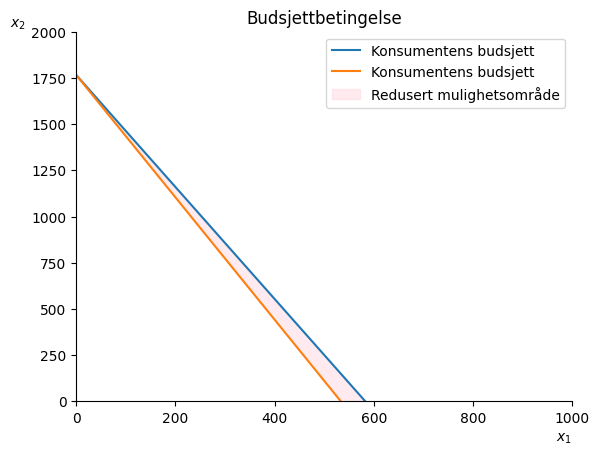

In [190]:

def budsjett(M, p1, p2, x1):
    return M/p2 - p1*x1/p2

x = np.linspace(0.001,1000,1000)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$x_2$', loc='top', rotation=0)
                ax.set_xlabel('$x_1$', loc='right')
                ax.set_xlim(0,1000)
                ax.set_ylim(0,2000)
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

ax.plot(x, budsjett(1766, 3.03, 1, x), label = 'Konsumentens budsjett')
ax.plot(x, budsjett(1766, 3.31, 1, x), label = 'Konsumentens budsjett')

ax.fill_between(x, budsjett(1766, 3.03, 1, x), budsjett(1766, 3.31, 1, x), color = "pink",alpha = 0.3,label='Redusert mulighetsområde')

ax.set_title('Budsjettbetingelse')
ax.legend(loc = 'best');


In [311]:
# symboler

x_1, x_2, a, b, U_0 =sp.symbols("x_1 x_2 a b U_0", real=True, positive=True)
U=x_1**a*x_2**b
U

# vi må løse for x_2 og et gitt nyttenivå
x_2_ind_sol=sp.solve(U-U_0,x_2)[0]
x_2_ind_sol

# gjør om for å plotte

indiff_x_2=sp.lambdify( (U_0,a,b,x_1), x_2_ind_sol)
indiff_x_2(U_0,a,b,x_1)

# nye symboler
p_1, p_2, m =sp.symbols("p_1 p_2 m", real=True, positive=True)

# budsjett
bud=p_1*x_1+p_2*x_2

# Beregne MSB

msb = sp.diff(U, x_1)/sp.diff(U,x_2)

# Løs likning (14)

x_2_rel=sp.solve(msb-p_1/p_2,x_2)[0]

# sett inn i m og løs for x_1

budsj=bud.subs(x_2,x_2_rel)
x_1_eq= sp.solve(budsj-m,x_1)[0]

# dette er likevektsløsning for x_1
#sett inn i x_2_rel for å få x_2_eq

x_2_eq= x_2_rel.subs(x_1,x_1_eq)

# steg 1 har vi løst x_1_eq og x_2_eq

# steg 2
U_max=U.subs([(x_1,x_1_eq),(x_2,x_2_eq)])

# Vi kan bruke tall i et oppslag for å regne numeriske verdier
# her er et eksempel
# la oss lage noen tall i et oppslag
in_dict = {"a":0,"b":1,"m":1766,"p_1":3.31,"p_2":1}

# Vi bruker disse tallene til å finne nytten som oppnås samt etterspørsel

nytte=sp.sympify(U_max).evalf(subs={a:in_dict['a'], b:in_dict['b'], m:in_dict['m'], p_1:in_dict['p_1'], p_2:in_dict['p_2']})
x_1_num=sp.sympify(x_1_eq).evalf(subs={a:in_dict['a'], b:in_dict['b'], m:in_dict['m'], p_1:in_dict['p_1'], p_2:in_dict['p_2']})
x_2_num=sp.sympify(x_2_eq).evalf(subs={a:in_dict['a'], b:in_dict['b'], m:in_dict['m'], p_1:in_dict['p_1'], p_2:in_dict['p_2']})

# steg 3 
# vi har laget x_2_ind_sol som løsning
# og vi har laget en funksjon ved lambdify: indiff_x_2(U_0,a,b,x_1)

# Ta a=.4, b=.25, m=2000, p_1=25, p_2=40

# finn verdien for U_max, x_1_eq og x_2_eq

nytte = U_max.subs([(a,0.05),(b,0.95),(m,1766),(p_1,3.31),(p_2,1)])
x_1_num = x_1_eq.subs([(a,0.05),(b,0.95),(m,1766),(p_1,3.31),(p_2,1)])
x_2_num = x_2_eq.subs([(a,0.05),(b,0.95),(m,1766),(p_1,3.31),(p_2,1)])

display(nytte)
display(x_1_num)
display(x_2_num)

1363.90846495672

26.6767371601208

1677.70000000000

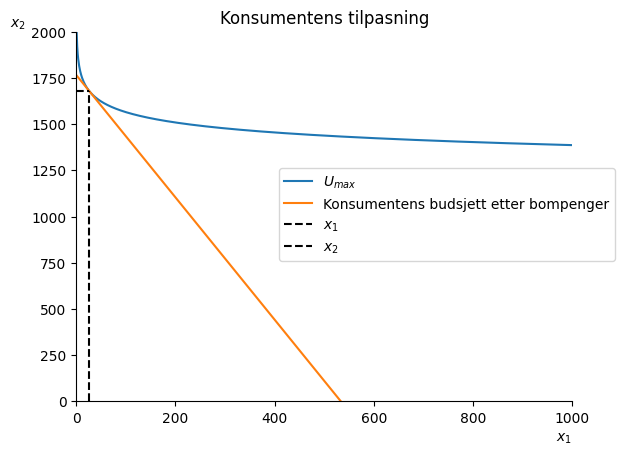

In [315]:
# nå kan vi plotte

fig, ax=create_ax()

# plott funksjonene

ax.plot(x, indiff_x_2(nytte,.05,0.95,x), label='$U_{max}$')
ax.plot(x, budsjett(1766, 3.31, 1, x), label = 'Konsumentens budsjett etter bompenger')

#ax.plot(x, indiff_x_2(nytte,.05,.95,x), label='$U_{max}$')
#ax.plot(x, budsjett(1766, 3.02, 1, x), label = 'Konsumentens budsjett før bompenger')

# tegn inn tilpasningen

ax.vlines(x_1_num,0,x_2_num, color='black',ls='dashed', label='$x_1$')
ax.hlines(x_2_num,0,x_1_num, color='black',ls='dashed', label='$x_2$')
# tittel
ax.set_title('Konsumentens tilpasning')

#vis navnene:
ax.legend(bbox_to_anchor=(1.1,0.65));
